# Notebook para el análisis de las preguntas de Quora

Carga del fichero

In [1]:
#Importación de las librerías NLTK y Gensim

import nltk
import gensim
import pandas as pd
import re
nltk.download('all')

#Cargo el dataset de ejemplo y veo su aspecto
total_questionsdf = pd.read_csv('train.csv')
print (total_questionsdf.shape)

#Selecciono las preguntas insinceras
insincere_questionsdf=total_questionsdf.loc[total_questionsdf['target'] == 1]
print (insincere_questionsdf.shape)

#Selecciono las sinceras
sincere_questionsdf=total_questionsdf.loc[total_questionsdf['target'] == 0].sample(len(insincere_questionsdf))
print (sincere_questionsdf.shape)



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

(1306122, 3)
(80810, 3)
(80810, 3)


Comprobación de memoria ColabPro

In [2]:
#Código para comprobar memoria tras haberme suscrito a ColabPro
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


## Análisis de principales características

### Palabras más frecuentes en cada grupo

In [3]:
from nltk import pos_tag, word_tokenize
from nltk.collocations import *
import re
import random

#Cargo todas las stopwords y añado algunas típicas del inglés no incluidas en nltk
stopwords = nltk.corpus.stopwords.words('english') + ['ve', 'hadn', 'll', 'didn', 'isn', 'doesn', 'hasn', 'n\'t' ]

#Meto en listas las palabras de las frases sinceras y las paso a minúsculas
sincere_questionsText=[palabra for palabra in sincere_questionsdf['question_text'].to_list() if palabra != 'empty']
sincere_questionsText = " ".join(sincere_questionsText).lower()

#Lo mismo con las insinceras
insincere_questionsText=[palabra for palabra in insincere_questionsdf['question_text'].to_list() if palabra != 'empty']
insincere_questionsText = " ".join(insincere_questionsText).lower()

#Tokens de insinceras.
tokensInsinceres = [w for w in word_tokenize(insincere_questionsText) if w not in stopwords]
#Me quedo con los tokens que empiezan por una letra
tokensInsinceres = [w for w in tokensInsinceres if re.match("^[a-z]+.*", w)]

#Tokens de sinceras.
tokensSinceres = [w for w in word_tokenize(sincere_questionsText) if w not in stopwords]
#Me quedo con los tokens que empiezan por una letra
tokensSinceres = [w for w in tokensSinceres if re.match("^[a-z]+.*", w)]


#Muestro las palabras que más aparecen
from collections import Counter
print("Mostramos las palabras que más aparecen, incluyendo su número de apariciones:")
print(Counter(tokensInsinceres))
print(Counter(tokensSinceres))

#PoS tagging de los tokens de la lista para saber qué tipo de palabra son
tokensEtiquetadosInsinceres = nltk.pos_tag(tokensInsinceres)
tokensEtiquetadosSinceres = nltk.pos_tag(tokensSinceres)






Mostramos las palabras que más aparecen, incluyendo su número de apariciones:
Counter({'people': 12948, 'trump': 6468, 'like': 5963, 'women': 5959, 'would': 4325, 'men': 4217, 'think': 3887, 'white': 3715, 'many': 3571, 'muslims': 3491, 'quora': 3406, 'india': 3291, 'get': 3226, 'indian': 3133, 'black': 2941, 'americans': 2916, 'us': 2883, 'sex': 2557, 'indians': 2508, 'girls': 2508, 'world': 2460, 'want': 2416, 'hate': 2236, 'liberals': 2098, 'chinese': 2089, 'much': 1974, 'make': 1963, 'country': 1933, 'muslim': 1903, 'one': 1816, 'even': 1810, 'american': 1785, 'america': 1677, 'president': 1609, 'feel': 1606, 'know': 1595, 'believe': 1531, 'donald': 1523, 'true': 1511, 'say': 1508, 'really': 1488, 'jews': 1464, 'gay': 1458, 'good': 1457, 'countries': 1431, 'questions': 1386, 'still': 1381, 'man': 1332, 'god': 1304, 'democrats': 1293, 'obama': 1285, 'ca': 1275, 'ever': 1250, 'woman': 1248, 'china': 1242, 'always': 1226, 'right': 1218, 'racist': 1210, 'take': 1195, 'government': 1166

### Longitud de frases en cada grupo

In [4]:
print ("La media de palabras por frase insincera es", len(tokensEtiquetadosInsinceres)/len(insincere_questionsdf))
print ("La media de palabras por frase sincera es", len(tokensEtiquetadosSinceres)/len(sincere_questionsdf))

La media de palabras por frase insincera es 8.88864001979953
La media de palabras por frase sincera es 6.137779977725529


### Palabras por categoría léxica para cada grupo

In [5]:

import operator

categoriasInsinceres = map(operator.itemgetter(1), tokensEtiquetadosInsinceres)
categoriasSinceres = map(operator.itemgetter(1), tokensEtiquetadosSinceres)
  
# muestro el primer elemento para cada categoría con Counter
print(Counter(categoriasInsinceres))
print(Counter(categoriasSinceres))


Counter({'NN': 200375, 'JJ': 165743, 'NNS': 119102, 'VBP': 62984, 'RB': 36235, 'VBG': 27310, 'VBD': 21282, 'VB': 18467, 'IN': 14944, 'VBN': 14347, 'VBZ': 11817, 'MD': 7779, 'CD': 3143, 'PRP': 3020, 'JJR': 2629, 'JJS': 2272, 'RBR': 1705, 'DT': 1587, 'FW': 946, 'NNP': 742, 'RP': 497, 'NNPS': 457, 'CC': 301, 'WRB': 129, 'RBS': 114, 'WDT': 109, 'WP$': 80, 'WP': 59, 'TO': 52, 'UH': 24, 'PRP$': 17, 'EX': 7, 'POS': 7, 'PDT': 7, "''": 1, 'SYM': 1})
Counter({'NN': 186782, 'JJ': 102023, 'NNS': 58653, 'VBP': 34037, 'RB': 20175, 'VBG': 18561, 'VB': 14834, 'VBD': 13346, 'VBN': 9740, 'IN': 9022, 'VBZ': 6846, 'MD': 6035, 'JJS': 4987, 'CD': 3346, 'JJR': 1730, 'RBR': 1261, 'PRP': 1067, 'DT': 781, 'NNP': 713, 'FW': 709, 'RBS': 532, 'RP': 230, 'CC': 210, 'WP': 100, 'WRB': 72, 'WDT': 57, 'WP$': 46, 'TO': 26, 'PRP$': 22, 'NNPS': 21, 'UH': 12, 'POS': 7, 'SYM': 5, 'EX': 2, "''": 2, 'PDT': 2})


## Métodos auxiliares a utilizar después.

In [6]:
#Importar los métodos de la librería NLTK que lematizan según Wordnet
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
from gensim.models.phrases import Phraser
from gensim.models import Phrases


#La función get_wn_pos traduce el formato de PoS del término según el pos-tagger al formato de PoS de Wordnet
def get_wn_pos(pos):
    if re.match(r'^N',pos):
        wn_pos = 'n'
    elif re.match(r'^V',pos):
        wn_pos = 'v'
    else:
        wn_pos = 'n' #En inglés, los lemas de términos que no son verbos ni nombres se obtienen como si fueran
                        #nombres
    return wn_pos

#La función wnlemmatize lematiza el término con una etiqueta PoS según el lematizador de Wordnet
def wnlemmatize(t,postag):
    lemma = ""
    #Definición del lematizador
    lem = WordNetLemmatizer()
    #Si el candidato es monopalabra, se obtiene el lema con el lematizador de WordNet según su PoS
    if ' ' not in t:
        lemma = lem.lemmatize(t,get_wn_pos(postag[0][1]))
    #Si el candidato es multipalabra, obtenemos su lema como si fuera un nombre, aplicando el lematizador de WordNet
    else:
        lemma = lem.lemmatize(t,'n')
    return lemma

#Categorías a excluir para un buen candidato    
no_pos_in = ['DT', 'IN', 'PRP', 'CC', 'CD','MD', 'VBG', 'VBD', 'RP', 'RB']

#Método para evaluar la idoneidad de una palabra o una combinación de palabras
def good_candidate(t,postag):
    v = False
    #Si es multipalabra
    if ' ' in t:
        tl = t.split(' ') #Generamos una lista de tokens
        #el token inicial y el token final deben ser alfabéticos y no pueden estar en la lista de stopwords..
        if re.match("^[a-z]+.*", tl[0]) and re.match("^[a-z]+.*", tl[-1]) and \
           tl[0] not in stopwords and tl[1] not in stopwords:
            #... ni su PoS puede estar en la lista no_pos_in
            if postag[0][1] not in no_pos_in and postag[-1][1] not in no_pos_in:
                v = True
    #Si es monopalabra
    else:
        #debe ser alfabético, y no estar en la lista de stopwords
        if t not in stopwords and re.match("^[a-z]+.*", t):
            #y su PoS no puede estar en la lista no_pos_in
            if postag[0][1] not in no_pos_in:
                v = True
    return v

##Generamos listas de preguntas sinceras e insinceras

In [7]:

#Importar los métodos de la librería NLTK que lematizan según Wordnet
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
from gensim.models.phrases import Phraser
from gensim.models import Phrases
#Ponemos las preguntas insinceras en una lista
insincere_questions_list = insincere_questionsdf['question_text'].tolist()

#Ponemos las sinceras en otra lista
sincere_questions_list = sincere_questionsdf['question_text'].tolist()

#Lista con todas las palabras de todas las preguntas
text_stream = [word_tokenize(str(d).lower()) for d in total_questionsdf['question_text'].tolist()]
#print(text_stream[:10])

#Convertimos las insinceras en un documento
terms_insincere_doc = " ".join(insincere_questions_list)
#Convertimos los sinceros en un documento
terms_sincere_doc = " ".join(sincere_questions_list)

#Creamos la colección de documentos con las sinceras y las insinceras
docs_col = [terms_insincere_doc, terms_sincere_doc]

#Obtengo la lista de phrases de todo el texto
phrases = Phrases(text_stream, min_count=1, threshold=2, delimiter=b' ')

#Método para transformar los documentos para posteriormente introducir en el tdIdfVectorizer
def transform_doc(doc):
    #Obtenemos los phrases según el modelo de detección de phrases que ha aprendido
    phraser = Phraser(phrases)
    doc_phrases = phraser[word_tokenize(doc.lower())]
    #Quitamos los signos de puntuación de los phrases
    text_phrases_stripped = [dp.strip('".,;:-():!?-‘’ ') for dp in doc_phrases if re.match("^[a-z]+.*", dp) ]
    #Hacemos etiquetaje de PoS de los phrases y lo guardamos en un diccionario (postag) 
    postag = {}
    for tps in text_phrases_stripped:
        postag[tps] = nltk.pos_tag(word_tokenize(tps))
    #Obtenemos los phrases que son términos, aplicando el método good_candidate y teniendo en cuenta 
    #su etiquetaje PoS.
    document_terms = [tps for tps in text_phrases_stripped if good_candidate(tps,postag[tps]) == True]
    #Lematizamos los términos con el lematizador de Wordnet
    terms_lemmatized = [wnlemmatize(dt,postag[dt]) for dt in document_terms]
    #Concatenamos los constituyentes de un término multipalabra con '_'
    terms_lemmatized_and_unified2display = [tlu.replace(' ','_') for tlu in terms_lemmatized ]
    return " ".join(terms_lemmatized_and_unified2display)

transf_col = [transform_doc(d) for d in docs_col]

### Utilizamos tdidf con las palabras que tenemos actualmente separadas en insinceras y sinceras.

In [8]:
#Importar la librería con los métodos para hacer la vectorización
from sklearn.feature_extraction.text import TfidfVectorizer

#Definimos el vectorizador. Su analyzer busca términos de tipo 'word'. 

vectorizador = TfidfVectorizer(
    analyzer= 'word',
    )

vec_fit = vectorizador.fit_transform(transf_col)

#Tomamos el array correspondiente a las preguntas insinceras
ta = vec_fit.toarray()[0]

#La relación feature name-valor de tf.idf se expresa en forma de tupla. El primer elemento de la tupla es el
#feature name y el segundo elemento es su valor de tf.idf en el documento N, en este caso el documento 0.
#Estas tuplas se van poniendo en una lista (tfidf_tuples) para que luego puedan ordenadarse de mayor a menor valor

tfidf_tuples = []

feature_names = vectorizador.get_feature_names()

for i in range(0, len(feature_names)):
    tfidf_tuples.append((feature_names[i], ta[i]))
    
#Se ordenan las tuplas
sorted_tuples = sorted(tfidf_tuples, key=lambda tup: tup[1], reverse=True)

labels = ['Term', 'TfIdf']

#Se crea un dataframe a partir del cual se construirá la tabla
df3 = pd.DataFrame.from_records(sorted_tuples, columns=labels)

#Construcción y visualización de la tabla
print ("")
print ("Valores de TfIdf de los términos en las preguntas insinceras") 
print ("")
print (df3. head(15))


Valores de TfIdf de los términos en las preguntas insinceras

        Term     TfIdf
0     people  0.456468
1      woman  0.310244
2      trump  0.232840
3     muslim  0.230607
4        men  0.184262
5     indian  0.167092
6   american  0.151737
7      think  0.140779
8      india  0.135544
9    country  0.121655
10      girl  0.115303
11      make  0.115094
12       get  0.111883
13     quora  0.111604
14   liberal  0.105462


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Análisis de la polaridad y subjetividad

In [9]:
#A continuación vamos a trabajar con la polaridad y la subjetividad de las palabras que obtenemos de TextBlob
from textblob import TextBlob
listaOpinionesInsinceras=insincere_questionsdf['question_text'].tolist()
listaOpinionesSinceras=sincere_questionsdf['question_text'].tolist()


listaSentimientosInsinceras=[]
for opinion in listaOpinionesInsinceras:
  blob=TextBlob(opinion)
  listaSentimientosInsinceras.append(blob.sentiment)

listaSentimientosSinceras=[]
for opinion in listaOpinionesSinceras:
  blob=TextBlob(opinion)
  listaSentimientosSinceras.append(blob.sentiment)



### Diferencias numéricas

In [11]:
#Vemos las diferencias de polaridad y subjetividad en insinceras y sinceras
from statistics import mean 
subjetividadInsinceras=list(map(operator.itemgetter(1), listaSentimientosInsinceras))
print("La subjetividad en insinceras es ", mean(subjetividadInsinceras))

subjetividadSinceras=list(map(operator.itemgetter(1), listaSentimientosSinceras))
print("La subjetividad en sinceras es ", mean(subjetividadSinceras))

polaridadInsinceras=list(map(operator.itemgetter(0), listaSentimientosInsinceras))
print("La polaridad en insinceras es ", mean(polaridadInsinceras))

polaridadSinceras=list(map(operator.itemgetter(0), listaSentimientosSinceras))
print("La polaridad en sinceras es ", mean(polaridadSinceras))

La subjetividad en insinceras es  0.36034002326071346
La subjetividad en sinceras es  0.27175137964012924
La polaridad en insinceras es  0.028165132166942962
La polaridad en sinceras es  0.10644512551247864


### Representación gráfica

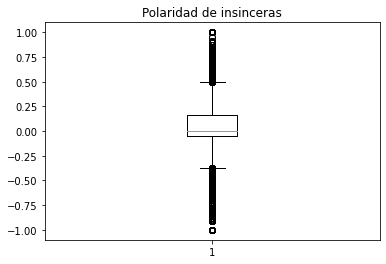

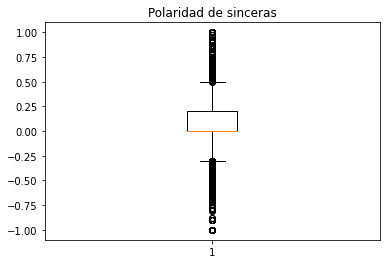

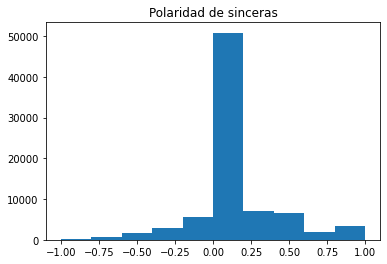

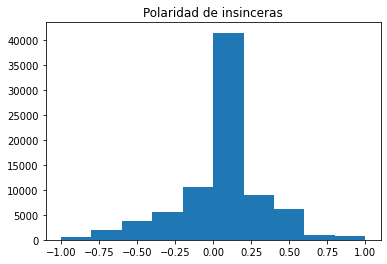

In [12]:
#Gráficos sobre la polaridad
import numpy
import matplotlib.pyplot as plt
plt.boxplot(polaridadInsinceras)
plt.title ("Polaridad de insinceras")
plt.show()


plt.boxplot(polaridadSinceras)
plt.title ("Polaridad de sinceras")
plt.show()


plt.hist(polaridadSinceras)
plt.title ("Polaridad de sinceras")
plt.show()

plt.hist(polaridadInsinceras)
plt.title ("Polaridad de insinceras")
plt.show()

## LDA para extracción de temas

### Cogemos las frases procesadas de categoría insincera

In [13]:
#Vamos a limpiar las frases para analizar de qué tratan
postag = {}
def transform_sentence(sentence):
    #Obtenemos los phrases según el modelo de detección de phrases que ha aprendido
    sentence_phrases = phrases[word_tokenize(sentence.lower())]
    #Quitamos los signos de puntuación de los phrases
    phrases_stripped = [st.strip('".,;:-():!?-‘’ ') for st in sentence_phrases if re.match("^[a-z]+.*", st)]
    #Hacemos etiquetaje de PoS de los phrases y lo guardamos en un diccionario (postag) 
    for ps in phrases_stripped:
        postag[ps] = nltk.pos_tag(word_tokenize(ps))
    document_terms = [tps for tps in phrases_stripped if good_candidate(tps,postag[tps]) == True]
    #Lematizamos los phrases con el lematizador de Wordnet
    phrases_lemmatized = [wnlemmatize(ps,postag[ps]) for ps in document_terms]
    return phrases_lemmatized

transformed_sentences = [transform_sentence(ss) for ss in insincere_questions_list ]

print(transformed_sentences[:5])

/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


[['state', 'become', 'dictatorship'], ['baby', 'dark skin', 'baby', 'light skin', 'baby'], ['black', 'support', 'school choice', 'mandatory', 'criminal', 'vote republican'], ['gay boy', 'love', 'boy', 'sexy', 'know', 'hot'], ['race', 'penis']]


### Creación de un diccionario BOW

In [14]:
#Creamos un diccionario BOW

dictionary = gensim.corpora.Dictionary(transformed_sentences)


#Creo el BOW para cada documento
bow_corpus = [dictionary.doc2bow(doc) for doc in transformed_sentences]



### Análisis LDA con el modelo BOW anterior

In [15]:
#Vamos a usar LDA para extraer temas. Cambiando num_topics lo podemos ajustar

lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 5, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)


#Vamos a ver las palabras que hay en cada topic y el peso que tienen
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.038*"muslim" + 0.021*"india" + 0.012*"people" + 0.012*"indian" + 0.011*"hindu" + 0.010*"islam" + 0.009*"pakistan" + 0.008*"country" + 0.007*"religion" + 0.006*"rape"


Topic: 1 
Words: 0.019*"quora" + 0.015*"jew" + 0.014*"god" + 0.014*"christian" + 0.009*"people" + 0.009*"guy" + 0.009*"atheist" + 0.007*"question" + 0.007*"stupid" + 0.007*"israel"


Topic: 2 
Words: 0.051*"woman" + 0.030*"men" + 0.010*"get" + 0.009*"people" + 0.008*"sex" + 0.006*"child" + 0.006*"right" + 0.006*"old" + 0.005*"feel" + 0.005*"male"


Topic: 3 
Words: 0.023*"people" + 0.018*"girl" + 0.013*"white" + 0.013*"indian" + 0.012*"black" + 0.011*"china" + 0.011*"chinese" + 0.010*"american" + 0.008*"think" + 0.008*"white people"


Topic: 4 
Words: 0.027*"trump" + 0.018*"people" + 0.015*"liberal" + 0.011*"donald trump" + 0.010*"democrat" + 0.008*"president" + 0.007*"conservative" + 0.007*"american" + 0.006*"republican" + 0.006*"obama"




## Importancia de un término concreto: Trump

### Word2Vec dentro de las preguntas insinceras

In [21]:
#Ahora vamos a ver el word2vec

w2vInsinceras = gensim.models.Word2Vec(
        transformed_sentences,
        size=150, # Tamaño de las dimensiones del vector
        window=20, #tamaño de la ventana donde buscar 
        min_count= 1200, #Frecuencia mínima de aparición de la palabra
        workers= 1,
        seed=1 
)
#... y lo entrenamos con los documentos transformados
w2vInsinceras.train(transformed_sentences, total_examples=len(transformed_sentences), epochs=10)

#Del vocabulario de phrases del modelo Word2Vec obtenemos los que son términos

phrases_vocabulary = list(w2vInsinceras.wv.vocab)

def phrase_is_term(phrase):
    test = False
    if phrase not in postag:
        pos = nltk.pos_tag(word_tokenize(phrase))
    else:
        pos = postag[phrase]
    if good_candidate(phrase,pos):
        test = True
    return test

terminos_vocabulario = [pv for pv in phrases_vocabulary if phrase_is_term(pv) == True]

### Palabras más cercanas a "Trump"

In [22]:
term = 'trump'

#El primer elemento de la tupla es el término y el segundo elemento es su valor de distancia a un término conreto (en nuestro caso Trump)
#Estas tuplas se van poniendo en una lista (w2v_tuples) para que luego 
#puedan ser ordenadas de más cercanas a menos cercanas

w2v_tuples = []

terminos = terminos_vocabulario

#Para cada feature name, calculamos su distancia respecto al término de referencia con el método model.similarity.
#Si la distancia es superior a 0, la tupla se pone en la lista de tuplas
for i in range(0, len(terminos)):
    if terminos[i] != term and w2vInsinceras.similarity(term, terminos[i]) > 0:
        w2v_tuples.append((terminos[i], w2vInsinceras.similarity(term, terminos[i])))
    
#Se ordenan las tuplas
w2v_sorted_tuples = sorted(w2v_tuples, key=lambda tup: tup[1], reverse=True)

print(w2v_sorted_tuples)

labels = ['Term', 'Distance']

#Se crea dataframe a partir del cual se construirá la tabla
df4 = pd.DataFrame.from_records(w2v_sorted_tuples, columns=labels)

#Construcción y visualización de la tabla
print ("")
print ("Distancia respecto al término", term) 
print ("")

print (df4.head(20))

[('american', 0.999223), ('quora', 0.9991209), ('country', 0.99888957), ('liberal', 0.9987248), ('make', 0.99835473), ('muslim', 0.9981568), ('think', 0.9980861), ('people', 0.99799234), ('indian', 0.9979891), ('get', 0.9978231), ('white', 0.99616504), ('black', 0.99555403), ('india', 0.9952648), ('girl', 0.99413574), ('woman', 0.9071314), ('men', 0.8857062)]

Distancia respecto al término trump

        Term  Distance
0   american  0.999223
1      quora  0.999121
2    country  0.998890
3    liberal  0.998725
4       make  0.998355
5     muslim  0.998157
6      think  0.998086
7     people  0.997992
8     indian  0.997989
9        get  0.997823
10     white  0.996165
11     black  0.995554
12     india  0.995265
13      girl  0.994136
14     woman  0.907131
15       men  0.885706


<ipython-input-22-0a1f17606bd8>:14: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  if terminos[i] != term and w2vInsinceras.similarity(term, terminos[i]) > 0:
<ipython-input-22-0a1f17606bd8>:15: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  w2v_tuples.append((terminos[i], w2vInsinceras.similarity(term, terminos[i])))


## Análisis del impacto de los NER's

### Vamos a ver la aparición de NER's en sinceras y sinceras

In [23]:
#A continuación vamos a ver los NER's

import spacy
from random import sample
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()


#Convertimos las insinceras en un documento. Cogemos solo 10.000 porque en otro caso el módulo de Spacy da error
terms_insincere_doc_reducido = " ".join(sample(insincere_questions_list, 10000))
#Convertimos los sinceros en un documento
terms_sincere_doc_reducido = " ".join(sample(sincere_questions_list, 10000))
#Limito el tamaño porque el parser no admite más caracteres. Es preciso cortar el tamaño para que funcione
docInsinceres = nlp(terms_insincere_doc_reducido)
docSinceres = nlp(terms_sincere_doc_reducido)
print("Las NERS en insinceras son ", len(docInsinceres.ents))
print("Las NERS en sinceras son ", len(docSinceres.ents))

Las NERS en insinceras son  15468
Las NERS en sinceras son  8081


### Vemos los NERs más frecuentes en NER's y la distribución en tipos por cada categoría (Sincera o insincera)

In [24]:
labels_Insinceras = [x.label_ for x in docInsinceres.ents]
termsInsinceras = [x.text for x in docInsinceres.ents]
print("Los términos más frecuentes en insinceras son ",Counter(termsInsinceras).most_common(20))
print("La distribución en insinceras es ", Counter(labels_Insinceras))

labels_Sinceras = [x.label_ for x in docSinceres.ents]
termsSinceras = [x.text for x in docSinceres.ents]
print("Los términos más frecuentes en sinceras son ",Counter(termsSinceras).most_common(20))
print("La distribución en sinceras es ",Counter(labels_Sinceras))

Los términos más frecuentes en insinceras son  [('Trump', 519), ('Muslims', 393), ('India', 375), ('Indian', 351), ('Quora', 341), ('Americans', 318), ('US', 255), ('Chinese', 253), ('Indians', 253), ('Muslim', 238), ('American', 191), ('America', 189), ('Jews', 180), ('China', 158), ('Hindus', 151), ('Donald Trump', 149), ('USA', 142), ('Islam', 139), ('Democrats', 132), ('Israel', 125)]
La distribución en insinceras es  Counter({'NORP': 5384, 'GPE': 3096, 'PERSON': 2501, 'ORG': 2166, 'DATE': 702, 'CARDINAL': 558, 'LOC': 337, 'WORK_OF_ART': 132, 'ORDINAL': 115, 'PRODUCT': 84, 'EVENT': 66, 'TIME': 62, 'PERCENT': 62, 'LANGUAGE': 60, 'MONEY': 51, 'FAC': 34, 'LAW': 31, 'QUANTITY': 27})
Los términos más frecuentes en sinceras son  [('India', 240), ('Quora', 95), ('first', 83), ('US', 81), ('Indian', 69), ('two', 66), ('one', 65), ('China', 61), ('English', 56), ('2017', 46), ('USA', 46), ('Canada', 44), ('Trump', 43), ('American', 42), ('2018', 41), ('today', 40), ('2', 37), ('Facebook', 3

In [26]:
%%shell
jupyter nbconvert --to html /content/asanchezmaz_TFM1_AnalisisLinguistico.ipynb


[NbConvertApp] WARNING | pattern '/content/asanchezmaz_TFM1_AnalisisLinguistico.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--Jupyter

CalledProcessError: ignored